#### install the requirements

In [1]:
# create venv for this chapter
!python3 -m venv chapter_env

In [2]:
#actiavate it 
!source chapter_env/bin/activate

In [3]:
!python3 -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


#### importing all lib for this chapter

In [4]:
from langchain_ollama import  ChatOllama
from langchain_openai import  ChatOpenAI
import os, dotenv 
from typing import Dict, TypedDict , Union
from langchain_core.messages import AIMessage, HumanMessage
from langgraph.graph import StateGraph , START , END

/home/aloha-zkaria/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
dotenv.load_dotenv()
google_api_key = os.getenv("GOOGLE_API_KEY") or ""
openai_api_key = os.getenv("OPENAI_API_KEY") or ""

In [6]:
from graphviz import Digraph
from IPython.display import display

def visualize_graph_inline(graph):
    dot = Digraph(comment="Agent State Graph")

    # Add nodes
    for node_name in graph.nodes:
        dot.node(node_name, node_name)

    # Add edges
    for start, end in graph.edges:
        dot.edge(str(start), str(end))

    # Display inline in Jupyter Notebook
    display(dot)

#  Minimal LangGraph Agent – LLM
One-node graph → LLM call → append response to messages

In [7]:
llm = ChatOllama(
    model="gemma3:270m",
    timeout=30,
    base_url="http://127.0.0.1:11434",
    use_mmap=True,
)

In [8]:
class AgentState(TypedDict):
    messages: list[Union[AIMessage, HumanMessage]]

In [9]:
def process(state:AgentState) -> AgentState:
    response = llm.invoke(state['messages'])
    state['messages'].append(AIMessage(content=response.content))
    return state

In [10]:
graph = StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START , "process")
graph.add_edge("process" , END)
app = graph.compile()

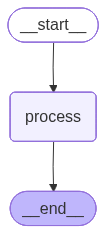

In [11]:
from IPython.display import Image , display
display(Image(app.get_graph().draw_mermaid_png()))

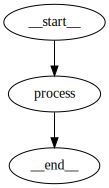

In [12]:
visualize_graph_inline(graph)

In [13]:
history = []

In [14]:
user_input ="Hello, how are you?"

In [15]:
history.append(HumanMessage(content=user_input))
state = {
    "messages": history
}
result = app.invoke(state)
ai_message = result['messages'][-1]
print(f"AI: {ai_message.content}")
history.append(ai_message)


AI: I am doing well, thank you for asking! How are you today?

